In [14]:
from datasets import load_dataset
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [2]:
#count job titles with pivot table
df.pivot_table(index='job_title_short', aggfunc='size')

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [3]:
df.groupby('job_title_short').size() #same as above but with groupby

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [4]:
#median salary by job title
df.pivot_table(values='salary_year_avg', index='job_title_short', aggfunc='median')

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [5]:
#median salary by job title and country
df.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short', aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [6]:
#top 6 contries with most jobs
top_countries = df['job_country'].value_counts().head(6).index
top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

In [7]:
# filter the dataframe to only include the top 6 countries
df_job_country_salary = df.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short', aggfunc='median')
df_job_country_salary = df_job_country_salary.loc[top_countries]
df_job_country_salary 

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0
Spain,86400.0,89100.0,91977.0,133000.0,88128.0,101029.0,111175.0,147500.0,157500.0,77050.0


In [8]:
# filter the filtered dataframe to include only 3 titles
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_job_country_salary = df_job_country_salary[job_titles]
df_job_country_salary 

job_title_short,Data Analyst,Data Scientist,Data Engineer
job_country,,,
United States,90000.0,130000.0,125000.0
India,100500.0,114008.0,147500.0
United Kingdom,87750.0,105300.0,110000.0
France,69175.0,88128.0,98301.5
Germany,103750.0,131560.0,147500.0
Spain,91977.0,88128.0,133000.0


<Axes: title={'center': 'Median Salary by Job Title and Country'}, xlabel='Country', ylabel='Median Salary ($USD)'>

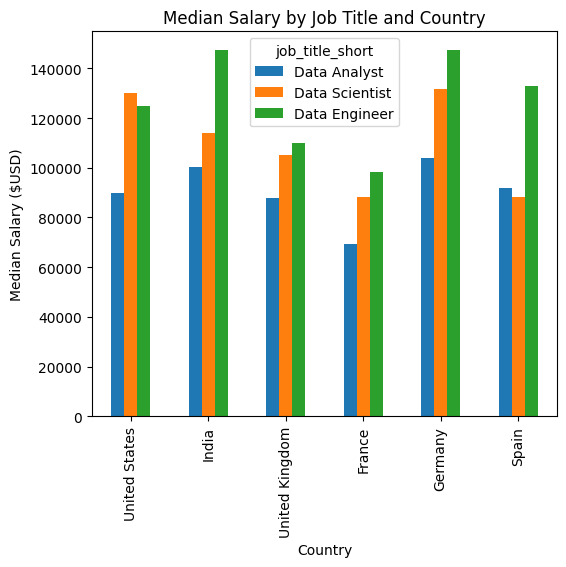

In [9]:
#plot the final dataframe
df_job_country_salary.plot(kind='bar', figsize=(6, 5), title='Median Salary by Job Title and Country', ylabel='Median Salary ($USD)', xlabel='Country')

In [10]:
#Create a pivot table to count the number of job postings for each job_title_short and job_country. Display the first 10 rows of the resulting pivot table.
job_country_count = df.pivot_table(index=['job_title_short', 'job_country'], aggfunc='size')
job_country_count.head(10)

job_title_short   job_country
Business Analyst  Afghanistan      4
                  Albania         11
                  Algeria         21
                  Angola           1
                  Argentina      453
                  Armenia         29
                  Australia      928
                  Austria        738
                  Azerbaijan      16
                  Bahamas          5
dtype: int64

In [11]:
#Create a pivot table to calculate the minimum, mean, and maximum salary_year_avg for the first five companies. Display the resulting pivot table.
salary_distr_per_country = df.pivot_table(values='salary_year_avg', index='company_name', aggfunc=['min', 'mean', 'max'])
salary_distr_per_country.head(5)

,min,mean,max
,salary_year_avg,salary_year_avg,salary_year_avg
company_name,,,
#twiceasnice Recruiting,61000.000000,77750.000000,120000.000000
/dev/color,125000.000000,125000.000000,125000.000000
0nward Select,92500.000000,92500.000000,92500.000000
1 Point System,137290.484375,137290.484375,137290.484375
1 Point System LLC.,170000.000000,170000.000000,170000.000000


In [12]:
#Create a pivot table to calculate the minimum, mean, and maximum salary_year_avg for top 5 hiring companies. Display the resulting pivot table.
df_cleaned = df.copy()
df_cleaned = df_cleaned.dropna(subset=['salary_year_avg']) #clean the data by removing rows with NaN in salary_year_avg
top_hiring_companies = df_cleaned['company_name'].value_counts().head(5).index
salary_distr_per_company = df_cleaned.pivot_table(values='salary_year_avg', index='company_name', aggfunc=['min', 'mean', 'max'])
salary_distr_per_company = salary_distr_per_company.loc[top_hiring_companies]
print(salary_distr_per_company)

                                min            mean             max
                    salary_year_avg salary_year_avg salary_year_avg
company_name                                                       
Jobot                       55000.0   131901.492537        250000.0
Capital One                 58926.0   190200.768683        348000.0
Booz Allen Hamilton         52100.0   116110.439560        198000.0
Robert Half                 50000.0   104050.089695        190000.0
Insight Global              35000.0   113527.423706        205000.0


In [16]:
#Create a pivot table to calculate the median of salary_year_avg for each company_name and job_country:

#    Filter the pivot table to only include 'Data Scientist' roles.
#    Then filter the pivot table to only include company_name with a median salary_year_avg greater than 200,000.
#    Display the first 10 rows of the resulting pivot table.

df_updated = df[df['job_title_short'] == 'Data Scientist'].copy() # Filter for Data Scientist roles
df_updated = df_updated.dropna(subset=['salary_year_avg']) # Remove rows with NaN in salary_year_avg
# Step 1: Identify top companies with median salary > 200k
top_companies = df_updated.groupby('company_name')['salary_year_avg'].median()
top_companies = top_companies[top_companies > 200000].index

# Step 2: Create the pivot table
pivot_table = df_updated.pivot_table(
    values='salary_year_avg',
    index=['company_name','job_country'],
    aggfunc='median'
)

# Step 3: Filter pivot table to include only those top companies
pivot_table = pivot_table.loc[top_companies]

# Display result
pivot_table

salary_year_avg
company_name job_country                   
ACT          Sudan                 225000.0
             United States         225000.0
Abbott       United States         204000.0
Airbnb       United States         212500.0
Airtable     Sudan                 215500.0
...                                     ...
Zocdoc       United States         208500.0
Zoox         United States         255000.0
Zoox.com     United States         350000.0
expand group United States         265000.0
nitruc       United States         255000.0

[167 rows x 1 columns]

In [ ]:
# Luke's version
# Filter for only Data Scientist jobs
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()

# Create pivot table
pivot_table = df_DS.pivot_table(values='salary_year_avg', index=['company_name', 'job_country'], aggfunc='median')
filtered_pivot_table = pivot_table[pivot_table['salary_year_avg'] > 200000]
filtered_pivot_table

salary_year_avg
company_name job_country                   
ACT          Sudan                 225000.0
             United States         225000.0
Abbott       United States         204000.0
Airbnb       United States         212500.0
Airtable     Sudan                 215500.0
...                                     ...
Zocdoc       United States         208500.0
Zoox         United States         255000.0
Zoox.com     United States         350000.0
expand group United States         265000.0
nitruc       United States         255000.0

[175 rows x 1 columns]